# Flipkart Review Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving Flipkart_ratings.csv to Flipkart_ratings (2).csv


In [2]:
df = pd.read_csv('Flipkart_ratings.csv')
df.head()

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,1,N,Y,One Star,garbage,31-08-2015
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015
2,US,46165193,R8R09HXXQHIWN,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,One Star,Setup way to complicated for the average user.,30-08-2015
3,US,31009192,R19JT1LFVNATBG,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,5,0,0,N,N,We love the camera but had a lot of difficulty...,We purchased a Foscam about 6 months ago. We l...,30-08-2015
4,US,52865176,R2SCARC7V2J64P,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,2,0,0,N,N,Saved Grandma but camera died after 2 yrs,Worked for 2 yrs as a 'granny cam' and saved h...,29-08-2015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        4652 non-null   object
 1   customer_id        4652 non-null   int64 
 2   review_id          4652 non-null   object
 3   product_title      4652 non-null   object
 4   product_category   4652 non-null   object
 5   star_rating        4652 non-null   int64 
 6   helpful_votes      4652 non-null   int64 
 7   total_votes        4652 non-null   int64 
 8   vine               4652 non-null   object
 9   verified_purchase  4652 non-null   object
 10  review_headline    4652 non-null   object
 11  review_body        4652 non-null   object
 12  review_date        4652 non-null   object
dtypes: int64(4), object(9)
memory usage: 472.6+ KB


In [4]:
df.describe()

,customer_id,star_rating,helpful_votes,total_votes
count,4.652000e+03,4652.000000,4652.000000,4652.000000
mean,3.042493e+07,4.008169,1.767627,2.535039
std,1.459990e+07,1.390115,44.011555,46.952126
min,3.810300e+04,1.000000,0.000000,0.000000
25%,1.659627e+07,4.000000,0.000000,0.000000
50%,3.035087e+07,5.000000,0.000000,0.000000
75%,4.409701e+07,5.000000,0.000000,1.000000
max,5.309641e+07,5.000000,2131.000000,2269.000000


In [5]:
df.shape

(4652, 13)

In [6]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df['product_title'].nunique()

1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


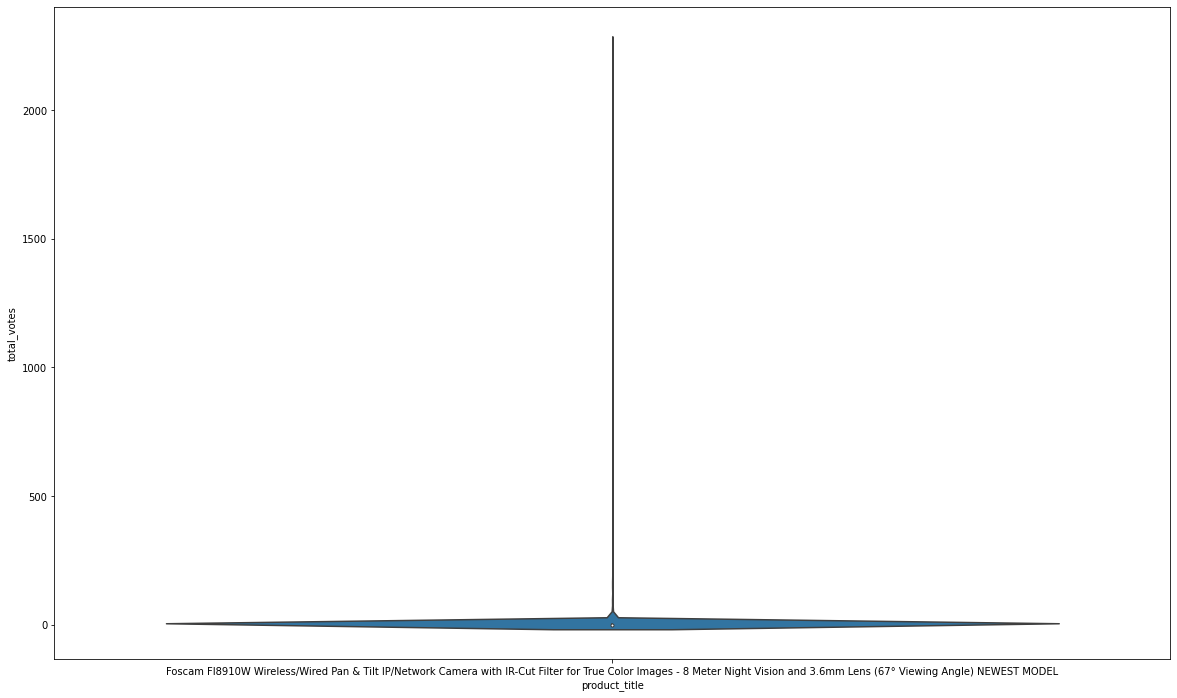

In [11]:
plt.figure(figsize=(20,12))
sns.violinplot(df['product_title'],df['total_votes'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


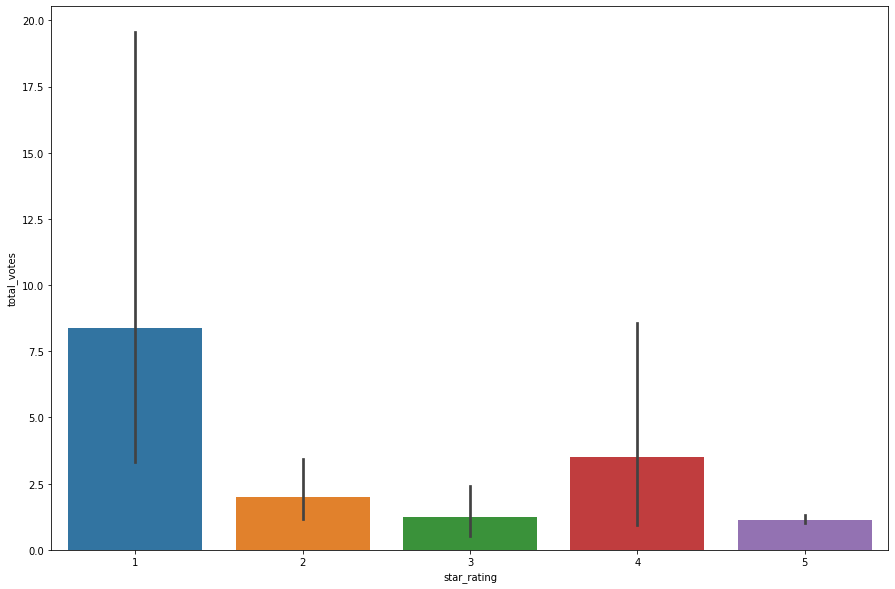

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(df['star_rating'],df['total_votes'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


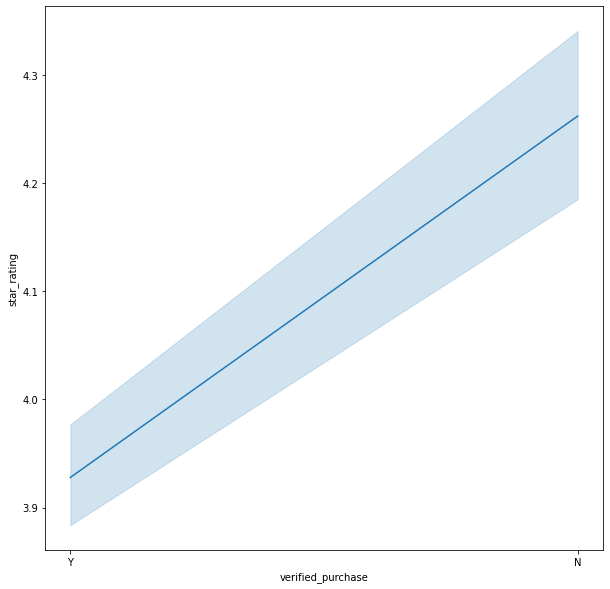

In [13]:
plt.figure(figsize=(10,10))
sns.lineplot(df['verified_purchase'],df['star_rating'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


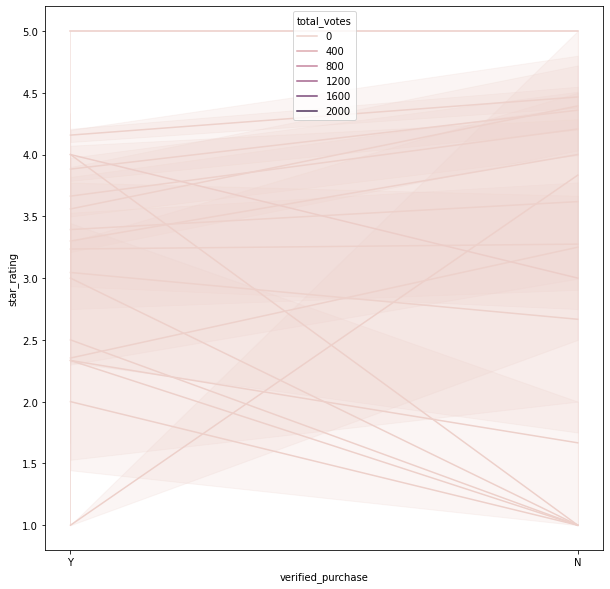

In [14]:
plt.figure(figsize=(10,10))
sns.lineplot(df['verified_purchase'],df['star_rating'],hue=df['total_votes'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


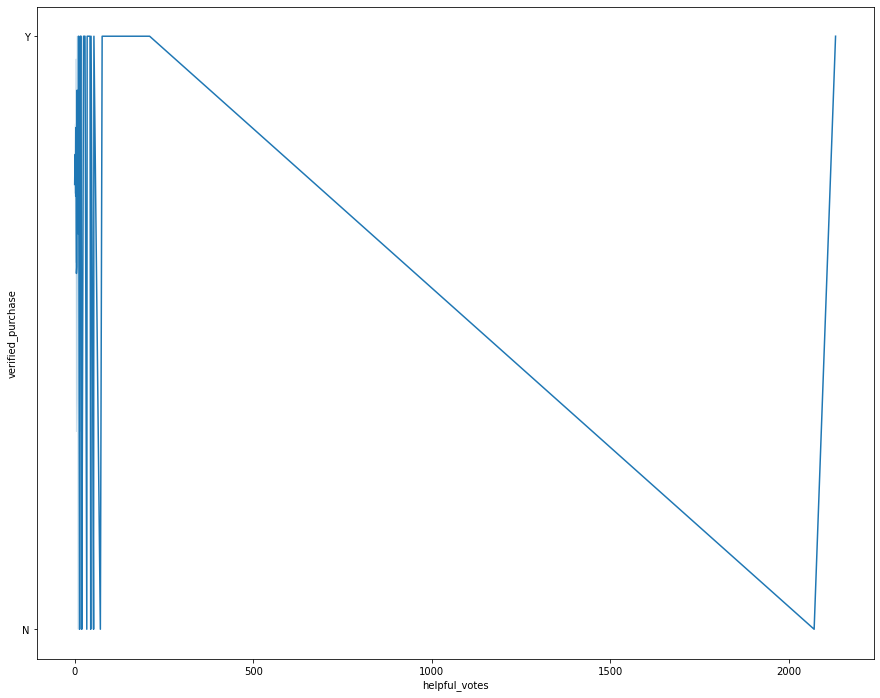

In [15]:
plt.figure(figsize=(15,12))
sns.lineplot(df['helpful_votes'],df['verified_purchase'],data=df)

In [6]:
df['Sentiment'] = [1 if x > 3 else 0 for x in df.star_rating]  #0-negative 1-positive

In [7]:
df['Sentiment']

0       0
1       0
2       0
3       1
4       0
       ..
4647    0
4648    1
4649    1
4650    1
4651    0
Name: Sentiment, Length: 4652, dtype: int64

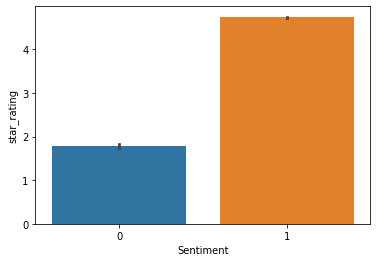

In [19]:
sns.barplot(x=df['Sentiment'],y=df['star_rating'])

In [12]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanjay_2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
corpus=[]

for i in range(0, 4652):
  review = re.sub('[^a-zA-Z]', ' ', df['review_headline'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [14]:
corpus

['one star',
 'work advertis',
 'one star',
 'love camera lot difficulti set',
 'save grandma camera die yr',
 'get pay',
 'complet total unreli',
 'three star',
 'not camera smart easiest setup could',
 'four star',
 'wake kid night loud click awar',
 'not simpl instal',
 'great product servic',
 'great babi monitor',
 'buy newer model want list function',
 'work',
 'five star',
 'great work',
 'good product',
 'simpli amaz',
 'set pain link camera',
 'outstand devic servic',
 'major flaw sensor',
 'carl great help set',
 'need littl tech support',
 'awesom',
 'not window',
 'high end hardwar low end softwar interfac exposur unknown third parti',
 'set internet connect not easi follow direct close work',
 'far good',
 'five star',
 'fairli decent netowrk camera',
 'oustand camera custom servic',
 'final set work great foscam screen share comput',
 'not buy',
 'bad choic problem tenvi',
 'good cam',
 'disappoint',
 'foscam wifi camera babi monitor',
 'two star',
 'product great job dif

Data Transformation

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2328820)

In [16]:
X = cv.fit_transform(corpus).toarray()
y = df['Sentiment'].values

In [17]:
import pickle
bow_path = open('c1_BoW_Sentiment_Model.pkl','wb')
pickle.dump(cv, bow_path)

In [80]:
from google.colab import files
files.download('c1_BoW_Sentiment_Model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

MODEL FITTING NAIVE BAYES


In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [20]:
import joblib
path  = open('c2_Classifier_sentiment_Model','wb')
joblib.dump(classifier, path)

In [84]:
from google.colab import files
files.download('c2_Classifier_sentiment_Model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MODEL PERFORMANCE

In [24]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
accuracy_score(y_test, y_pred)

[[215  25]
 [570 121]]
              precision    recall  f1-score   support

           0       0.27      0.90      0.42       240
           1       0.83      0.18      0.29       691

    accuracy                           0.36       931
   macro avg       0.55      0.54      0.35       931
weighted avg       0.69      0.36      0.32       931



0.3609022556390977

In [23]:
from sklearn.metrics import classification_report
y_pred_train = classifier.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.30      1.00      0.46       905
           1       1.00      0.26      0.41      2816

    accuracy                           0.44      3721
   macro avg       0.65      0.63      0.44      3721
weighted avg       0.83      0.44      0.42      3721



In [ ]:
classifier.predict_proba[:,1]

## Final Approach

In [11]:
review = df['review_headline']

In [12]:
import nltk

In [13]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stop_words = stopwords.words('english')

In [14]:
snow = SnowballStemmer('english')

In [16]:
pip install emoji

     |████████████████████████████████| 170 kB 1.7 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169295 sha256=273c50c1475e4050d4c75f79c5b7aac22c13d2b6988ccf1673386810b2637326
  Stored in directory: /Users/sanjay_2/Library/Caches/pip/wheels/04/29/50/1e7189f03d2cf139e469863d54a1d3eabeb10c92c84e51f8a1
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [17]:
import emoji
import re
from nltk.tokenize import word_tokenize

In [18]:
review = [re.sub("!","",txt) for txt in review]
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
def give_emoji_free_text(comm):
    allchars = [str for str in comm]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in comm.split() if not any(i in str for i in emoji_list)])
    return clean_text

review = [give_emoji_free_text(txt) for txt in review]
review = [give_emoji_free_text(txt) for txt in review]
review = [re.sub("READ MORE|READ MOR|READ MO","",i) for i in review]
review = [re.sub('-','',i) for i in review]
review = [re.sub('\d','',i) for i in review]

In [19]:
text =[]
setstop = ['money','purchase','penny','market','product','every']
stopw = (stopwords.words('english'))
stopw.extend(setstop)
stopw = set(stopw)

for message in review:
    message = message.lower().strip()
    words = [snow.stem(word) for word in message.split() if word not in stopw]
    text.append(' '.join(words))

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sanjay_2/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
v= []
for val in text:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    v.append(" ".join(tokens))
for word in range(len(v)):
    token = word_tokenize(v[word])
    for tkn in token:
        if tkn in stopw:
            token.remove(tkn)
    v[word] = " ".join([str(ele) for ele in token])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
count_vect = CountVectorizer(max_features=5000)
bow_data = count_vect.fit_transform(v).toarray()

In [26]:
count_vect.get_feature_names()[:10]

['abil',
 'abl',
 'able',
 'absolut',
 'abus',
 'accept',
 'access',
 'accident',
 'accord',
 'account']

In [27]:
tf_idf = TfidfVectorizer()
tf_data = tf_idf.fit_transform(v).toarray()
tf_data.shape

(4652, 1699)

In [30]:
z = []
import random
for i in range(len(v)):
    c = random.randint(0,1)
    z.append(c)
df['Score'] = z
y = df['Score']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(tf_data,y)

In [32]:
x_train.shape

(3489, 1699)

In [33]:
y_test.shape

(1163,)

In [34]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.5184866723989682

In [37]:
accuracy_score(y_train,lr.predict(x_train))

0.6832903410719404

In [38]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[281, 294],
       [266, 322]])

# Trying Textblob

In [39]:
from textblob import TextBlob
score = []
for i in range(len(v)):
    bl = TextBlob(v[i])
    score.append(bl.sentiment.polarity)

In [40]:
for i in range(len(score)):
    if score[i] < 0.0:
        score[i] = 0
    elif score[i] > 0.0:
        score[i] = 1
    elif score[i] == 0.0:
        score[i] = 0

In [41]:
df['Score'] = score

In [43]:
df['Score'].value_counts()

0    2660
1    1992
Name: Score, dtype: int64

In [45]:
df.review_headline = v
vect = TfidfVectorizer()
X=vect.fit_transform(df.review_headline).toarray()

X_df = pd.DataFrame(X,columns = vect.get_feature_names())

In [46]:
y = df['Score']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_df,y,test_size=0.7,random_state=123,stratify=y)
log_reg = LogisticRegression(penalty='l2',C=1.0).fit(X_train,y_train)
print("Trainig set:",log_reg.score(X_train,y_train))
print("Testing set:",log_reg.score(X_test,y_test))

Trainig set: 0.956989247311828
Testing set: 0.9361375498925392


In [48]:
y_pred = log_reg.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.9361375498925392

In [50]:
accuracy_score(y_train,log_reg.predict(X_train))

0.956989247311828

In [51]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1856,    6],
       [ 202, 1193]])